In [410]:
% matplotlib inline
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})

import matplotlib.pyplot as plt
import json

In [411]:
df = pd.read_json('logins.json')

In [412]:
df.shape

(93142, 1)

In [413]:
df.columns

Index(['login_time'], dtype='object')

In [414]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [416]:
df.set_index('login_time', inplace = True)
df['count'] = 1
new_df=df.resample('15T', how = sum)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  This is separate from the ipykernel package so we can avoid doing imports until


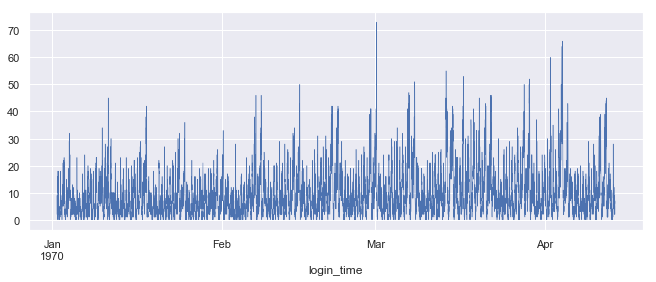

In [417]:
new_df['count'].plot(linewidth=0.5)


We can observe some fluctuations but we need detailed representation to clearly understand the pattern.

In [419]:
new_df['Date']=new_df.index

In [420]:
new_df.head()

,count,Date
login_time,,
1970-01-01 20:00:00,2,1970-01-01 20:00:00
1970-01-01 20:15:00,6,1970-01-01 20:15:00
1970-01-01 20:30:00,9,1970-01-01 20:30:00
1970-01-01 20:45:00,7,1970-01-01 20:45:00
1970-01-01 21:00:00,1,1970-01-01 21:00:00


In [421]:
column_1 = new_df.ix[:,1]



/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [422]:


final_Df=pd.DataFrame({"year": column_1.dt.year,
              "month": column_1.dt.month,
              "day": column_1.dt.day,
              "hour": column_1.dt.hour,
              "dayofyear": column_1.dt.dayofyear,
              "week": column_1.dt.week,
              "weekofyear": column_1.dt.weekofyear,
              "dayofweek": column_1.dt.dayofweek,
              "weekday": column_1.dt.weekday,
              "quarter": column_1.dt.quarter,
             })

In [423]:
df=final_Df.join(new_df)

In [428]:
df=df.drop('Date',axis=1)

In [435]:
df.head()

,year,month,day,hour,dayofyear,week,weekofyear,dayofweek,weekday,quarter,count
login_time,,,,,,,,,,,
1970-01-01 20:00:00,1970,1,1,20,1,1,1,3,3,1,2
1970-01-01 20:15:00,1970,1,1,20,1,1,1,3,3,1,6
1970-01-01 20:30:00,1970,1,1,20,1,1,1,3,3,1,9
1970-01-01 20:45:00,1970,1,1,20,1,1,1,3,3,1,7
1970-01-01 21:00:00,1970,1,1,21,1,1,1,3,3,1,1


# Monthwise distribution

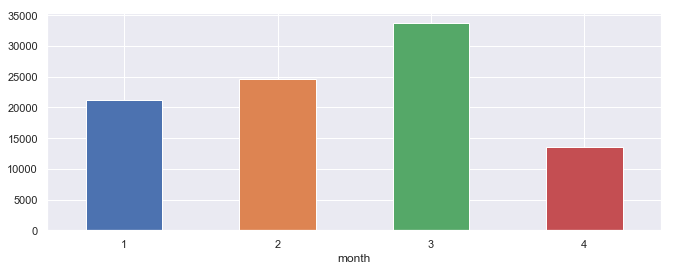

In [429]:
month_counts = df.groupby('month')['count'].sum()
ax = month_counts.plot.bar(x='month', y='count', rot=0)

# Hourly Distribution

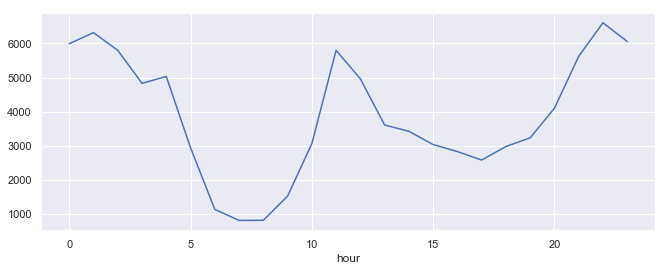

In [434]:
hour_counts = df.groupby('hour')['count'].sum()
ax = hour_counts.plot.line(x='hour', y='count', rot=0)

# Weekdays Distribution

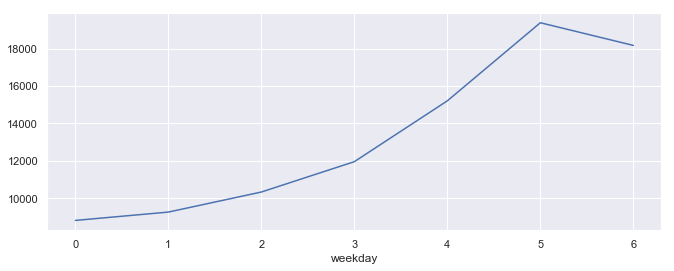

In [437]:
weekday_counts = df.groupby('weekday')['count'].sum()

ax = weekday_counts.plot.line(x='weekday', y='count', rot=0)

# SUMMARY

In [ ]:
1.There are more logins towards end of week such as Saturday and Sunday
2.There are more number of logins in the month of March
3.The hourly rate fluctuates for nights they peak ,getting slower for early morning (may be sleep time and morning routines)
and again peaks at 10am slightly down at afternoon and again peaks high after 8pm.
                                                                                     

# Experiment and Metrics Design


The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.


In [ ]:
For the hypothesis ,I assume that there is equal demand in both cities i.e. Gotham at Night and Metropolis at day.
So far null hypothesis would like to test number of customers served in both cities as per specified favourable time is same
Alternative hypothesis would be opposite of null hypothesis.
If we fail to reject null hypothesis we may go with reimursing all toll costs to be available in both cities.
We have to collect the data of drivers and total number of customers for each city for few days for our
analysis.



In [266]:
#df_1 = pd.read_json('ultimate_data_challenge.json')
#file is not in a proper format to be readable by above function

In [267]:
data = open('ultimate_data_challenge.json', 'r').readline()


In [268]:
data = json.loads(data)


In [269]:
df2 = pd.DataFrame(data)
df2.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [270]:
df2.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [271]:
df2.isnull().mean()

avg_dist                  0.00000
avg_rating_by_driver      0.00402
avg_rating_of_driver      0.16244
avg_surge                 0.00000
city                      0.00000
last_trip_date            0.00000
phone                     0.00792
signup_date               0.00000
surge_pct                 0.00000
trips_in_first_30_days    0.00000
ultimate_black_user       0.00000
weekday_pct               0.00000
dtype: float64

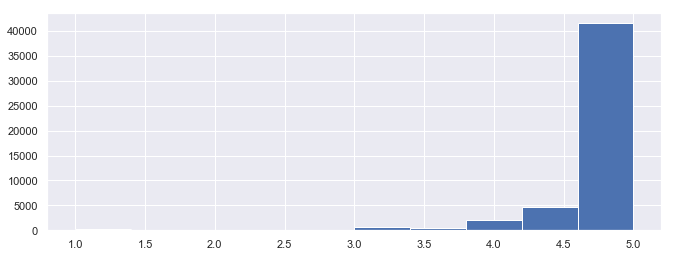

In [272]:
df2.avg_rating_by_driver.hist()




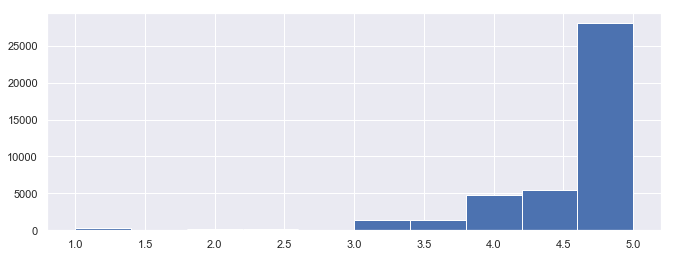

In [273]:
df2.avg_rating_of_driver.hist()



In [274]:
df2['avg_rating_by_driver'] = df2['avg_rating_by_driver'].fillna(df2['avg_rating_by_driver'].median())

In [275]:
df2['avg_rating_of_driver'] = df2['avg_rating_of_driver'].fillna(df2['avg_rating_of_driver'].median())

In [276]:
df2['phone'].value_counts()


iPhone     34582
Android    15022
Name: phone, dtype: int64

In [277]:
df2['phone'] = df2['phone'].fillna('iPhone')


In [278]:
df2['signup_date'].dtypes

dtype('O')

In [279]:
df2[["signup_date", "last_trip_date"]] = df2[["signup_date", "last_trip_date"]].apply(pd.to_datetime)


In [280]:
df2['last_trip_date'].sort_values(ascending=False).head(10)


45357   2014-07-01
22735   2014-07-01
14473   2014-07-01
38651   2014-07-01
45126   2014-07-01
14419   2014-07-01
38661   2014-07-01
45143   2014-07-01
45154   2014-07-01
45155   2014-07-01
Name: last_trip_date, dtype: datetime64[ns]

We can see the last trip date is JULY 1ST So we need the riders active before one month to be retained.

In [281]:
df2['retained'] = df2['last_trip_date'].apply(lambda x: 1 if x >= pd.Timestamp('2014-06-01', tz=None) else 0)

In [282]:
df2['retained'].value_counts()


0    31196
1    18804
Name: retained, dtype: int64

In [283]:
df2.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


In [284]:
df2.dtypes

avg_dist                         float64
avg_rating_by_driver             float64
avg_rating_of_driver             float64
avg_surge                        float64
city                              object
last_trip_date            datetime64[ns]
phone                             object
signup_date               datetime64[ns]
surge_pct                        float64
trips_in_first_30_days             int64
ultimate_black_user                 bool
weekday_pct                      float64
retained                           int64
dtype: object

In [285]:
df2 = df2.drop('last_trip_date',axis=1)
df2 = df2.drop('signup_date', axis=1)

In [286]:
#converting columns to Appropriate value
df2.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained
0,3.67,5.0,4.7,1.10,King's Landing,iPhone,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,Android,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,iPhone,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,iPhone,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,Android,11.8,14,False,82.4,0


In [287]:
df2['city'] = df2.city.astype('category')
df2['phone'] = df2.phone.astype('category')


In [288]:
cols_to_transform_class = pd.DataFrame(df2,columns=['city','phone'])

In [289]:
cols_to_transform_class.head()

,city,phone
0,King's Landing,iPhone
1,Astapor,Android
2,Astapor,iPhone
3,King's Landing,iPhone
4,Winterfell,Android


In [290]:
dummies = pd.get_dummies(cols_to_transform_class)

In [291]:
df2 = df2.drop('city',axis=1)
df2 = df2.drop('phone',axis=1)

In [292]:
final_df=df2.join(dummies)

In [293]:
final_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,3.67,5.0,4.7,1.10,15.4,4,True,46.2,1,0,1,0,0,1
1,8.26,5.0,5.0,1.00,0.0,0,False,50.0,0,1,0,0,1,0
2,0.77,5.0,4.3,1.00,0.0,3,False,100.0,0,1,0,0,0,1
3,2.36,4.9,4.6,1.14,20.0,9,True,80.0,1,0,1,0,0,1
4,3.13,4.9,4.4,1.19,11.8,14,False,82.4,0,0,0,1,1,0


In [294]:
final_df['ultimate_black_user'] = final_df['ultimate_black_user'].apply(lambda x: 1 if x else 0)


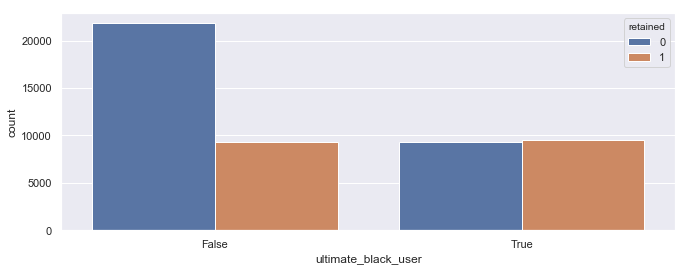

In [295]:
sns.countplot(x='ultimate_black_user', data=df2, hue='retained')


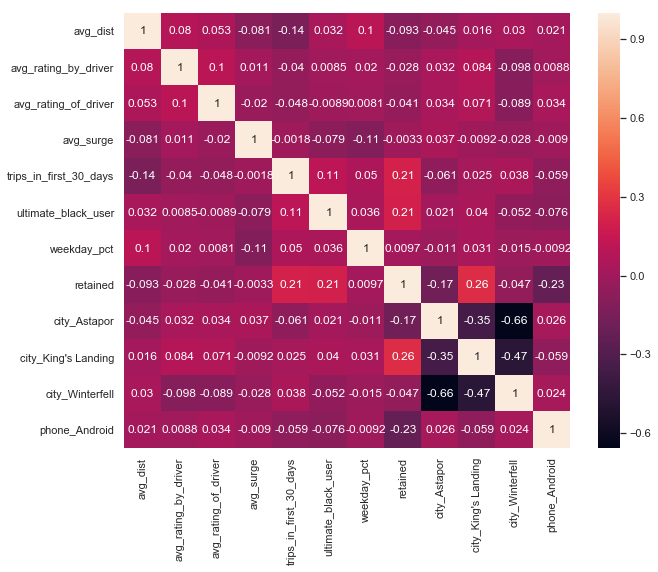

In [311]:
plt.figure(figsize=(10,8))
sns.heatmap(final_df.corr(),annot=True)

In [312]:

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
 


In [313]:
corr_features = correlation(final_df, 0.7)
#print('correlated features: ', len(set(corr_features)) )

In [314]:
corr_features

set()

In [315]:
final_df.drop(labels=corr_features, axis=1, inplace=True)

# Building Machine Learning Model

In [324]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier


In [317]:
X, y = final_df.drop(['retained'], axis=1), final_df['retained']


In [318]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.85, test_size=0.15, stratify=y)

# LOGISTIC REGRESSION

In [319]:
clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(train_X, train_y)
# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(test_X), test_y))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.72


In [322]:
from sklearn.metrics import classification_report
print(classification_report(train_y,clf.predict(train_X)))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79     26517
           1       0.67      0.49      0.57     15983

   micro avg       0.72      0.72      0.72     42500
   macro avg       0.70      0.67      0.68     42500
weighted avg       0.71      0.72      0.71     42500



In [330]:
clf.score(test_X, test_y)

0.72

# RANDOMFOREST

In [326]:
# Fitting Random Forest classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier_rf.fit(train_X, train_y)

# Predicting the Test set results
y_pred_rf = classifier_rf.predict(train_X)

# Making the confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(train_y, y_pred_rf)

In [327]:
cm

array([[26302,   215],
       [  824, 15159]])

In [328]:
print(accuracy_score(classifier_rf.predict(test_X), test_y))



0.7464


In [329]:
classifier_rf.score(test_X,test_y)

0.7464

# GRADIENT BOOSTING

In [325]:
classifier = GradientBoostingClassifier(verbose=True, n_estimators=200)
classifier.fit(train_X, train_y)
classifier.score(test_X, test_y)

      Iter       Train Loss   Remaining Time 
         1           1.2794            6.95s
         2           1.2431            5.42s
         3           1.2128            4.85s
         4           1.1862            4.49s
         5           1.1644            4.25s
         6           1.1445            4.11s
         7           1.1216            4.01s
         8           1.1069            3.92s
         9           1.0931            3.86s
        10           1.0767            3.80s
        20           0.9966            3.49s
        30           0.9633            3.26s
        40           0.9455            3.08s
        50           0.9348            2.87s
        60           0.9277            2.64s
        70           0.9231            2.49s
        80           0.9195            2.29s
        90           0.9159            2.07s
       100           0.9122            1.86s
       200           0.8918            0.00s


0.7849333333333334

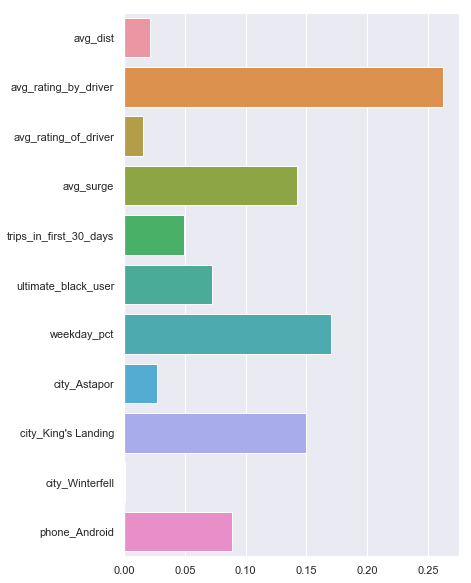

In [331]:
plt.figure(figsize=(6,10))
sns.barplot(y=X.columns, x=classifier.feature_importances_)